In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

from train_agent import read_data
import matplotlib.pyplot as plt
import numpy as np
import munch
import json

In [31]:
history_length = 5
model = Sequential([
            Conv2D(32, (8, 8), strides=(2, 2), activation='relu',
                   input_shape=(96, 96, history_length)),
            Conv2D(64, (8, 8), strides=(2, 2), activation='relu'),
            Conv2D(128, (5, 5), activation='relu'),
            Conv2D(128, (5, 5), activation='relu'),
            Flatten(),
            Dense(1024, activation='relu'),
            Dense(128, activation='relu'),
            Dense(3, activation='linear')
        ])

In [32]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 45, 45, 32)        10272     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 19, 19, 64)        131136    
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 15, 15, 128)       204928    
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 11, 128)       409728    
_________________________________________________________________
flatten_15 (Flatten)         (None, 15488)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              15860736  
_________________________________________________________________
dense_2 (Dense)              (None, 128)             

In [2]:
filename = "data-20200923-102355.pkl.gzip"
X_train, y_train, X_valid, y_valid = read_data(filename)

... read data


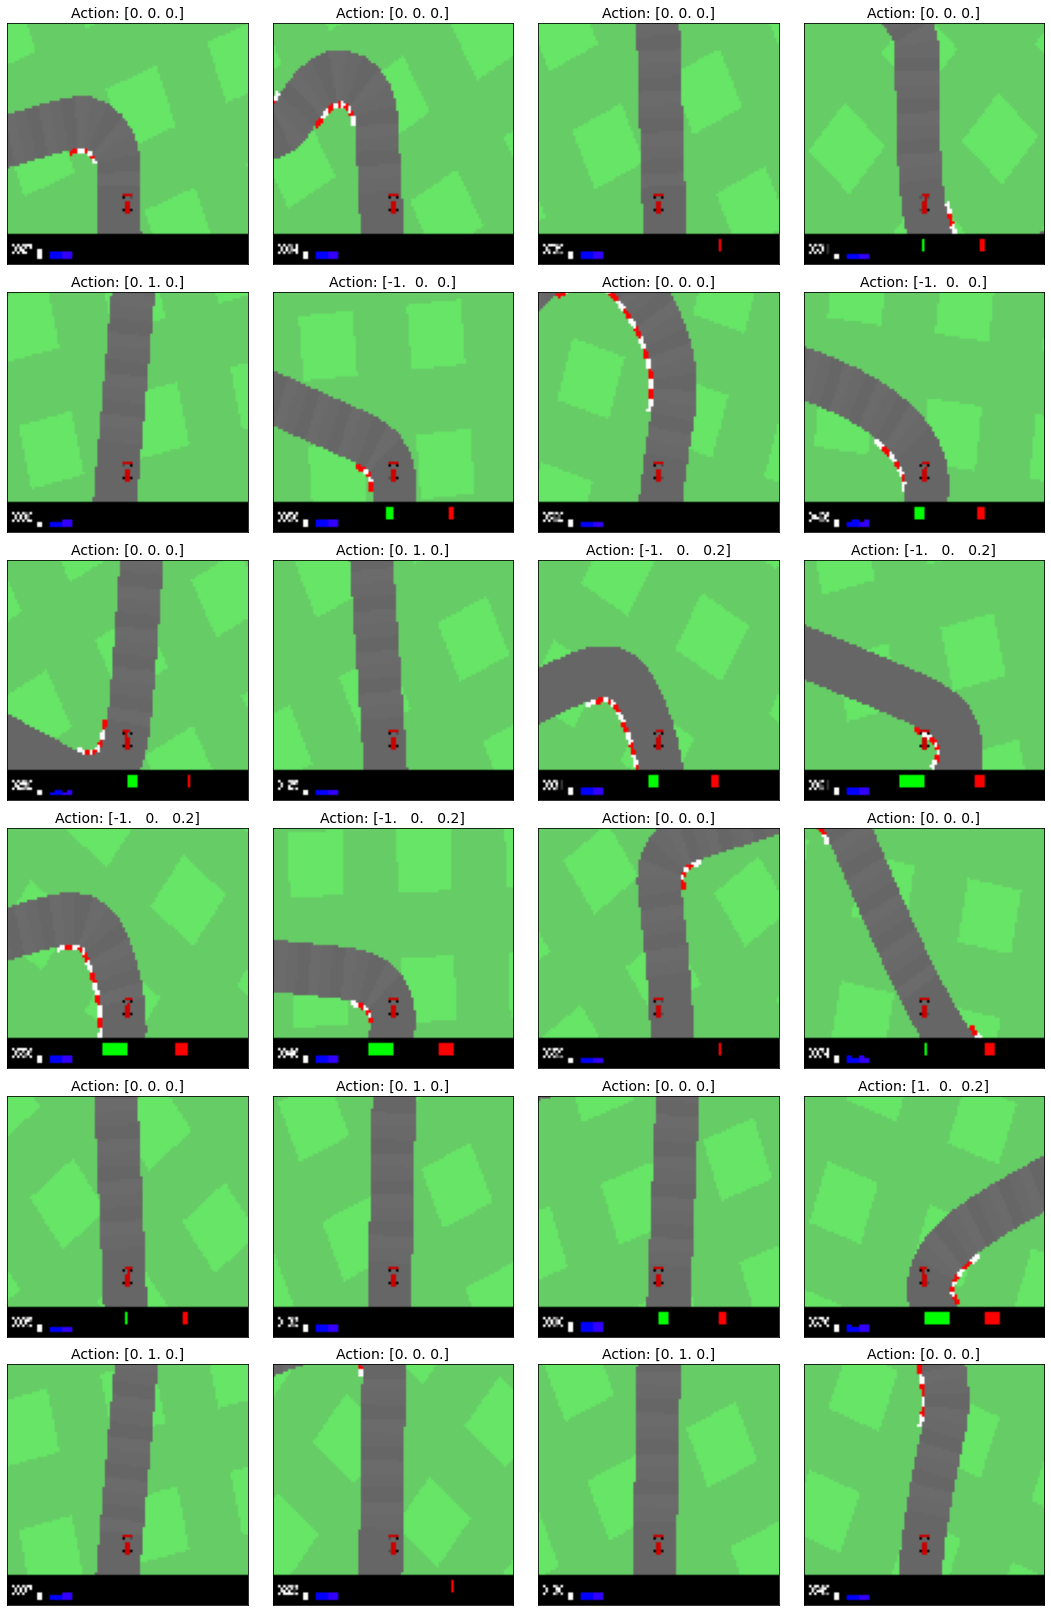

In [94]:
col = 4
row = 6
img_idx = np.random.choice(X_train.shape[0], col*row, replace=False)
imgs = X_train[img_idx, :, :, :]
actions = y_train[img_idx, :]

axes=[]
fig=plt.figure(figsize=(15, 22.5))
counter = 0

for i in range(row):
    for j in range(col):
        img = imgs[counter, :, :, :].astype(int)
        axes.append(fig.add_subplot(row, col, counter+1))
        subplot_title=("Action: "+str(actions[counter]))
        axes[-1].set_title(subplot_title, fontsize=14)
        plt.setp(axes[-1].get_xticklabels(), visible=False)
        plt.setp(axes[-1].get_yticklabels(), visible=False)
        axes[-1].tick_params(axis='both', which='both', length=0)
        plt.imshow(img)
        counter += 1

fig.tight_layout()    
plt.show()
fig.savefig('collect_data.png', bbox_inches='tight', dpi=200)

In [46]:
filename = "data-20200928-115557.pkl.gzip"
X_test, y_test, X_valid_test, y_valid_test = read_data(filename)

... read data


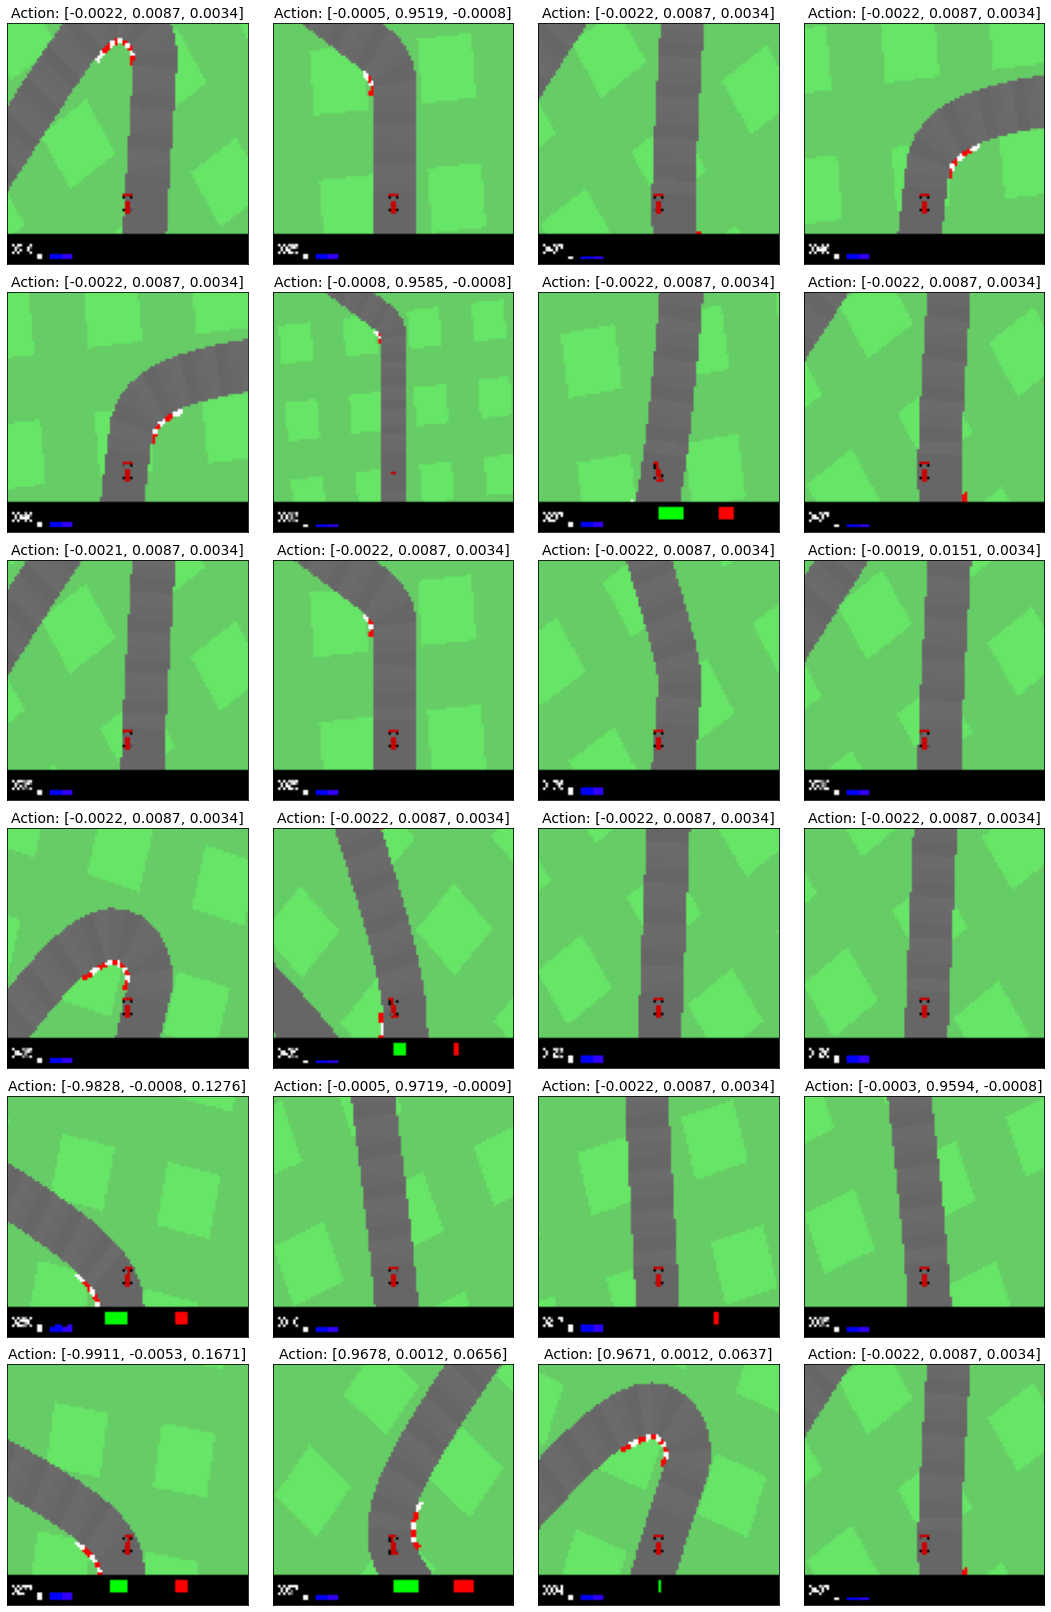

In [92]:
col = 4
row = 6
img_idx = np.random.choice(X_test.shape[0], col*row, replace=False)
imgs = X_test[img_idx, :, :, :]
actions = y_test[img_idx, :]

axes=[]
fig=plt.figure(figsize=(15, 22.5))
counter = 0

for i in range(row):
    for j in range(col):
        img = imgs[counter, :, :, :].astype(int)
        axes.append(fig.add_subplot(row, col, counter+1))
        subplot_title=("Action: [{:.4f}, {:.4f}, {:.4f}]".format(
                       actions[counter][0], actions[counter][1], actions[counter][2]))
        axes[-1].set_title(subplot_title, fontsize=14)
        plt.setp(axes[-1].get_xticklabels(), visible=False)
        plt.setp(axes[-1].get_yticklabels(), visible=False)
        axes[-1].tick_params(axis='both', which='both', length=0)
        plt.imshow(img)
        counter += 1

fig.tight_layout()    
plt.show()
fig.savefig('test_data.png', bbox_inches='tight', dpi=200)

In [59]:
class Model:
   def __init__(self, history_length, lr=1e-4):

       # Define network
       inputs = tf.keras.Input(shape=(96, 96, history_length), name='input')
       l1 = Conv2D(32, (8, 8), strides=(2, 2), activation='relu')(inputs)
       l2 = Conv2D(64, (8, 8), strides=(2, 2), activation='relu')(l1)
       l3 = Conv2D(128, (5, 5), activation='relu')(l2)
       l4 = Conv2D(128, (5, 5), activation='relu')(l3)
       l5 = Flatten()(l4)
       l6 = Dense(1024, activation='relu')(l5)
       d6 = Dropout(0.5)(l6)
       l7 = Dense(128, activation='relu')(d6)
       d7 = Dropout(0.5)(l7)
       l8 = Dense(3, activation='linear')(d7)
       self.model = tf.keras.Model(inputs=inputs, outputs=l8)

       # Loss and optimizer
       self.loss = tf.keras.losses.MeanSquaredError()
       self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

In [60]:
model = Model(10)

In [61]:
model.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 96, 96, 10)]      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 32)        20512     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 64)        131136    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       204928    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       409728    
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              158607

In [86]:
result_40000_path = "results/results_bc_agent-40000.json"
with open(result_40000_path) as json_data_file:
    result_40000 = json.load(json_data_file)
result_40000 = munch.munchify(result_40000)

result_20000_path = "results/results_bc_agent-20000.json"
with open(result_20000_path) as json_data_file:
    result_20000 = json.load(json_data_file)
result_20000 = munch.munchify(result_20000)

result_5000_path = "results/results_bc_agent-5000-2.json"
with open(result_5000_path) as json_data_file:
    result_5000 = json.load(json_data_file)
result_5000 = munch.munchify(result_5000)

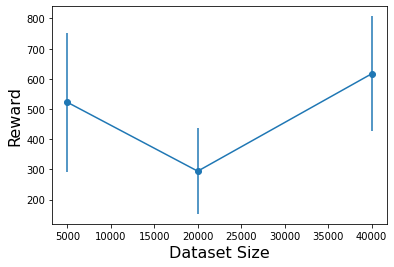

In [87]:
plt.figure()
plt.errorbar([5000, 20000, 40000], 
             [result_5000.mean, result_20000.mean, result_40000.mean], 
             yerr=[result_5000.std, result_20000.std, result_40000.std], fmt='-o')
plt.xlabel('Dataset Size', fontsize=16)
plt.ylabel('Reward', fontsize=16)
plt.savefig('datasize.png', bbox_inches='tight', dpi=200)
plt.show()

In [88]:
result_pre_dagger = "results/results_bc_agent-pre-dagger.json"
with open(result_pre_dagger) as json_data_file:
    result_pre = json.load(json_data_file)
result_pre = munch.munchify(result_pre)

result_post_dagger = "results/results_bc_agent-post-dagger.json"
with open(result_post_dagger) as json_data_file:
    result_post = json.load(json_data_file)
result_post = munch.munchify(result_post)

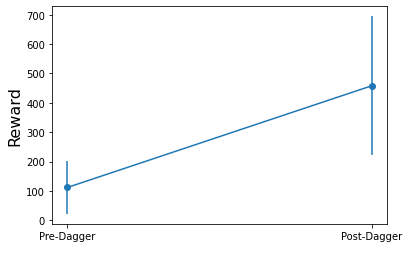

In [96]:
plt.figure()
plt.errorbar(["Pre-Dagger", "Post-Dagger"], 
             [result_pre.mean, result_post.mean], 
             yerr=[result_pre.std, result_post.std], fmt='-o')
plt.xlabel(' ', fontsize=16)
plt.ylabel('Reward', fontsize=16)
plt.savefig('dagger.png', bbox_inches='tight', dpi=200)
plt.show()